# Final Project

Executive Summary :

Bank X detected a steep fall of credit card users which contributed significantly to their annual income. Retaining credit card user is vital to ensure their steady income through numerous fee charged from credit card transaction. Therefore, this analysis is used to help predict customers who are likely to churn based on their profile and transaction history.

***Notes :
we are given 21 features/variables where 'Attrition_Flag' acts as target variable (outcome). It is a categorical variable with binary value, 'existing customer' and 'attrited customer'

In [88]:
#importing essentials library without machine learning models library 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing 
from collections import Counter


%matplotlib inline

In [89]:
#importing the dataset + quick look into the first 3 row 
df = pd.read_csv('BankChurners.csv')
df.head(3)
#The dataset consist of 10127 rows with 23 columns 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [90]:
df.shape

(10127, 23)

In [91]:
#we have 10127 row with 23 variables
#the last two column and CLIENTUM has no used therefore they will be drop accordingly
df.drop([df.columns[0],df.columns[21],df.columns[22]],axis=1,inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# EXPLORATORY DATA ANALYSIS

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

The dataset contain of 6 objects, 5 floats and 10 integers. The target variable is 'Attrition_Flag', coded in string/object. 

# Categorical Variable 

In [93]:
#Categorical Variable 
dfc = df.select_dtypes(include=[object])
dfc.head(2)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue


In [94]:
for i in dfc.columns :
    print(dfc[i].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


**Note :

There are 6 categorical features, which are :

Attrition_Flag : Binary, existing vs attrtited customer

Gender : Binary, M and F

Education_Level : Ordinal, Uneductaed to Doctorate

Marital_Status : Single to Divorced

Income_Category : Oridnal, <40k to >120k

Card_Category : Blue, Gold, Silver, Platinum 

Some features such as Education_Level, Income_Category and Marital_Status have some "unknown" values which will be treated as 'missing value' and subjected for preprocessing. 

In [95]:
#Further investigation to target variable 
dfc["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

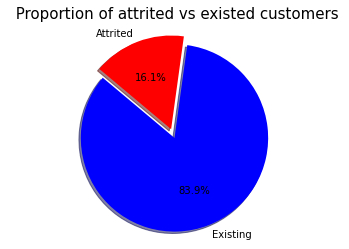

In [96]:
#Attrition_Flag is in binary form, therefore we can use pie chart to visualize the proportions
x = ['Existing', 'Attrited']
y = [8500, 1627]
labels = x
sizes = y

colors = ['blue', 'red']
explode = (0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title(' Proportion of attrited vs existed customers', fontsize=15)
plt.axis('equal')
plt.show()

The pie chart illustrates the proportion of existing and attrited customers in Bank DS.There is a significant disporportion between the two groups, where 16.1% of the customers have attrited from bank X and 83.9%  remain active. In conclusion, this target variable is imbalanced.

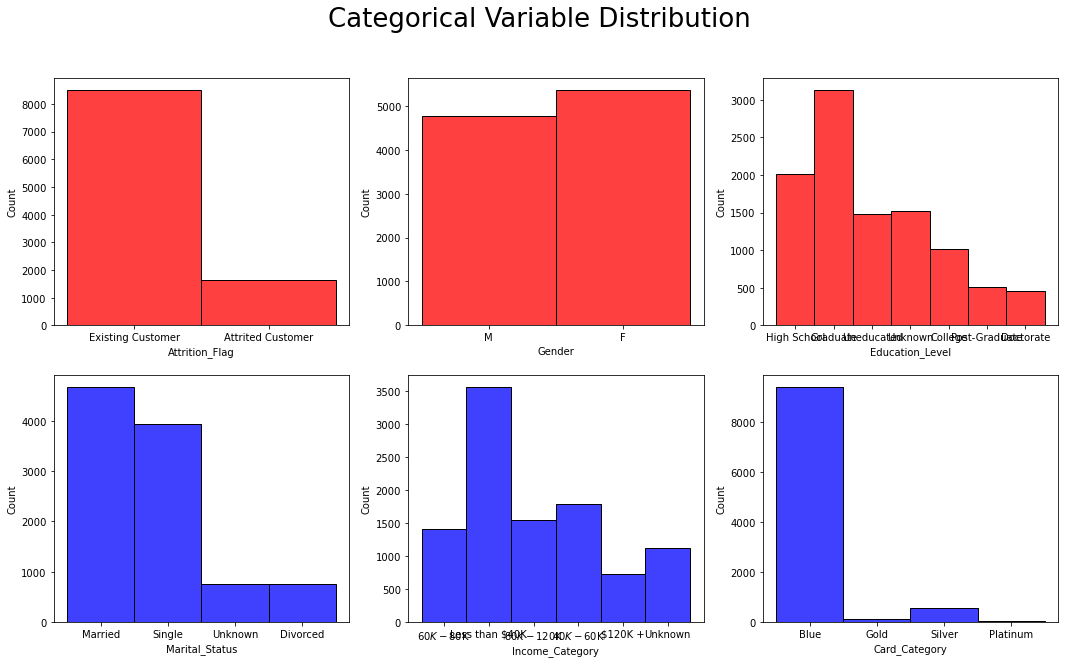

In [97]:
#Checking the categorical variable distribution with histogram  
fig, axes = plt.subplots(2, 3, figsize=(18,10))
fig.suptitle('Categorical Variable Distribution', size = 26)
sns.histplot(df['Attrition_Flag'], ax=axes[0,0],color="red")
sns.histplot(df['Gender'], ax=axes[0,1], color = "red")
sns.histplot(df['Education_Level'], ax=axes[0,2], color= "red")
sns.histplot(df["Marital_Status"], ax=axes[1,0],  color = "blue")
sns.histplot(df["Income_Category"], ax=axes[1,1], color = "blue")
sns.histplot(df["Card_Category"], ax=axes[1,2], color = "blue")


plt.savefig('saving-a-seaborn-plot-as-eps-file.tiff')

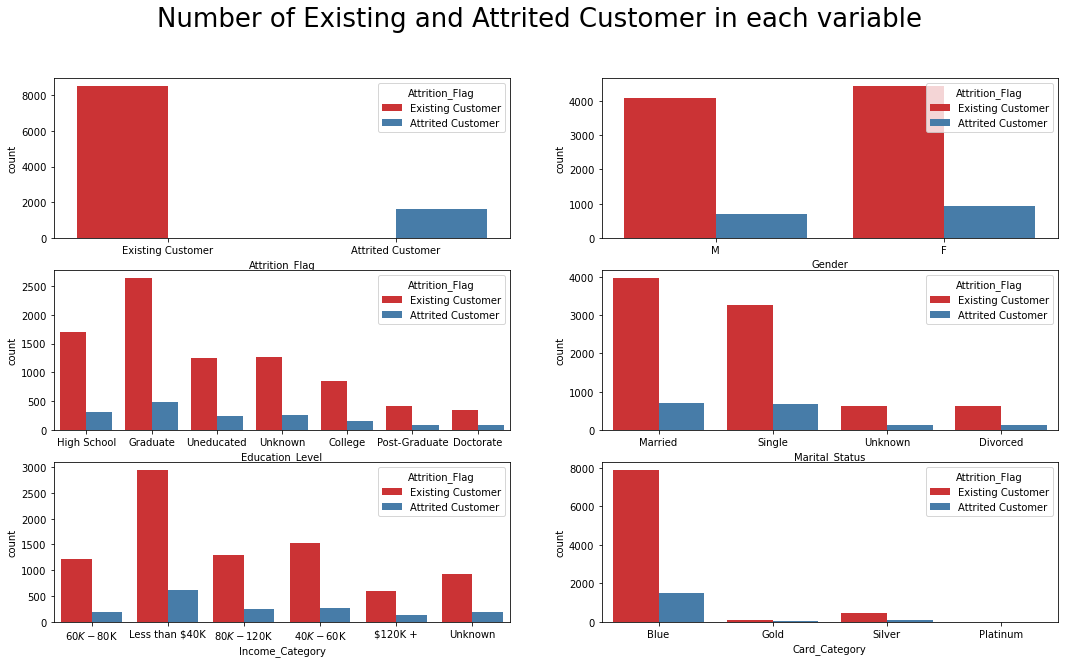

In [98]:
#Using countplot with hue to further describe how the variable relate with customer status 
fig, axes = plt.subplots(3, 2, figsize=(18,10))
fig.suptitle('Number of Existing and Attrited Customer in each variable', size = 26)
sns.countplot(ax=axes[0,0], x=df['Attrition_Flag'],hue=df['Attrition_Flag'], data = df, palette="Set1")
sns.countplot(ax=axes[0,1], x=df['Gender'],hue=df['Attrition_Flag'], data = df, palette="Set1")
sns.countplot(ax=axes[1,0], x=df['Education_Level'],hue=df['Attrition_Flag'], data = df, palette="Set1")
sns.countplot(ax=axes[1,1], x=df['Marital_Status'],hue=df['Attrition_Flag'], data = df, palette="Set1")
sns.countplot(ax=axes[2,0], x=df['Income_Category'],hue=df['Attrition_Flag'], data = df, palette="Set1")
sns.countplot(ax=axes[2,1], x=df['Card_Category'],hue=df['Attrition_Flag'], data = df, palette="Set1")

plt.savefig('cat.tiff')

The dataset is distributed evenly amongst gender. Majority of the customers have university degree, married with income less than $ 40.000. Almost 90% of the customers are at the Blue tier of the card. When divided between attrtied and existed customers, the trends remain unchanged. 

# Numerical Variable

In [99]:
#Convert the target variable into numerical data 0 for Existing Customer and 1 for Attrited Customer
df.Attrition_Flag = pd.factorize(df.Attrition_Flag)[0]
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [100]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [101]:
#Separate numerical features from the dataset
dfn=df.select_dtypes(exclude=[object])
dfn.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [102]:
#Creating pivot table to investigate the numerical categories further
pivot_num = dfn.pivot_table(index='Attrition_Flag', aggfunc='median')
pivot_num

,Avg_Open_To_Buy,Avg_Utilization_Ratio,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Attrition_Flag,,,,,,,,,,,,,,
0,3469.5,0.211,2,4643.5,46,2,2,36,0.743,0.721,4,1364,4100,71
1,3488.0,0.000,3,4178.0,47,2,3,36,0.701,0.531,3,0,2329,43


The pivot table shows comparison between Attrited and Existing customer based on Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio. There is no much difference between two groups corresponding to median. 

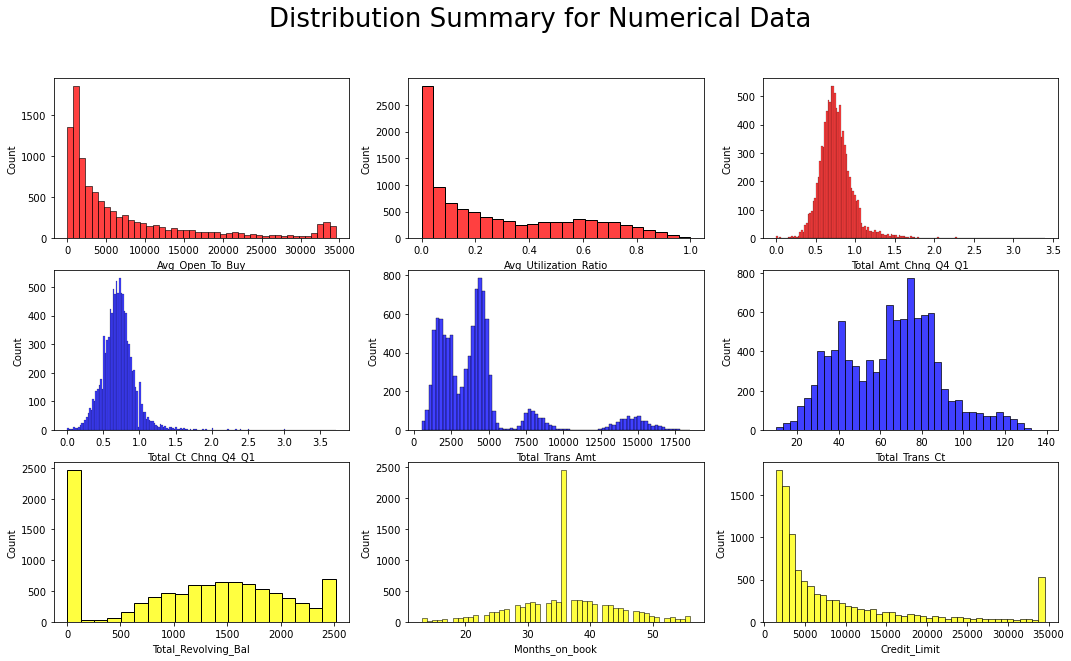

In [103]:
#Checking the distribution 
fig, axes = plt.subplots(3, 3, figsize=(18,10))
fig.suptitle('Distribution Summary for Numerical Data', size = 26)
sns.histplot(dfn['Avg_Open_To_Buy'],ax=axes[0,0], color='red')
sns.histplot(dfn['Avg_Utilization_Ratio'],ax=axes[0,1], color='red')
sns.histplot(dfn['Total_Amt_Chng_Q4_Q1'],ax=axes[0,2], color ='red')
sns.histplot(dfn['Total_Ct_Chng_Q4_Q1'], ax=axes[1,0], color='blue')
sns.histplot(dfn['Total_Trans_Amt'],ax=axes[1,1], color='blue' )
sns.histplot(dfn['Total_Trans_Ct'],ax=axes[1,2], color ='blue')
sns.histplot(dfn['Total_Revolving_Bal'],ax=axes[2,0], color ='yellow')
sns.histplot(dfn['Months_on_book'],ax=axes[2,1], color ='yellow')
sns.histplot(dfn['Credit_Limit'],ax=axes[2,2], color ='yellow')

plt.savefig('num.tiff')

Most of the variables are not evenly distributed e.g Avg_Open_To_Buy, Avg_Utilization_Ratio and Credit_Limit are skewed to the left.

Outliers are detected in some variable such as Credit_limit where some customers limit reaches $35.000

More than 2000 customers have zero credit balance and >2500 customer have not used their credit card (Avg_Utilization_Ratio = 0).

The change in transaction amount is normally distributed with mean 0.7

The total transaction amount in the last 12 months is greatly varied. Most customers have made a total of 40-80 transactions in the past 12 months.

The change in the number of transactions is relatively stable through out quarters (0 to 1.5)

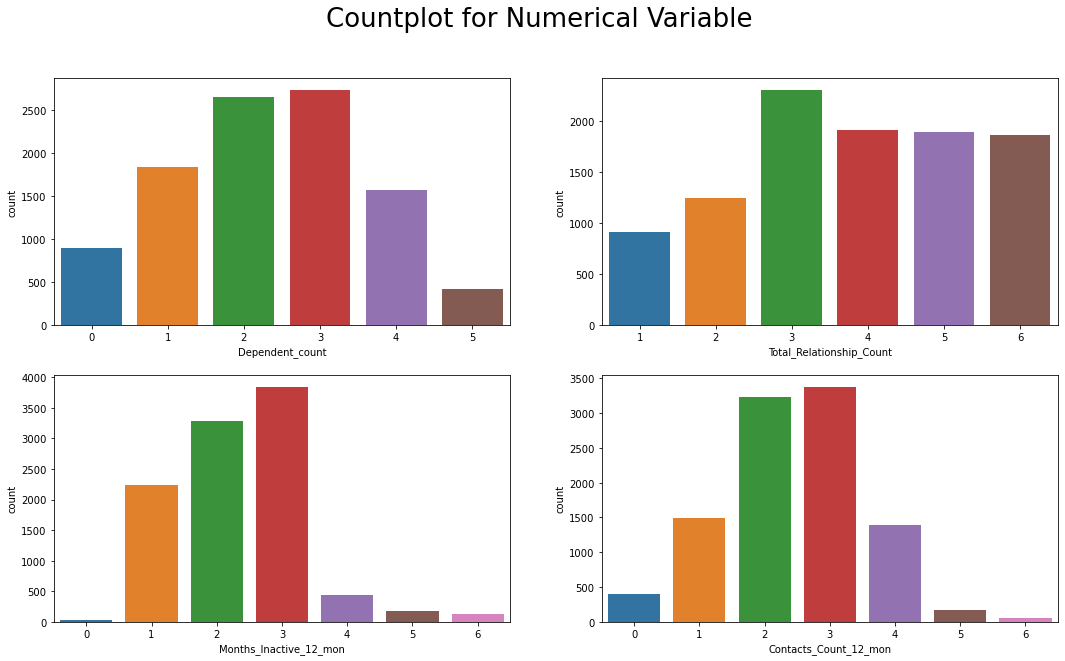

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
fig.suptitle('Countplot for Numerical Variable', size = 26)
sns.countplot(ax=axes[0,0], x=df['Dependent_count'], data = df)
sns.countplot(ax=axes[0,1], x=df['Total_Relationship_Count'],data = df)
sns.countplot(ax=axes[1,0], x=df['Months_Inactive_12_mon'],data = df)
sns.countplot(ax=axes[1,1], x=df['Contacts_Count_12_mon'],data = df)

plt.savefig('num1.tiff')


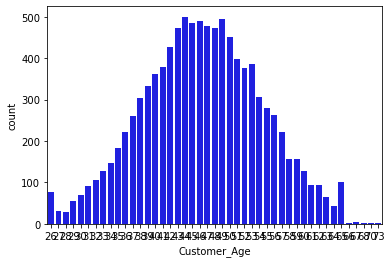

In [105]:
sns.countplot(x=dfn['Customer_Age'], data = df, color = 'blue')
#age is normally distributed 
plt.savefig('num2.tiff')

Points taken :

The majority of the customers have either 2 or 3 dependents.

Most customers have exactly 36-months before they terminate their account (outlier) 

Majority of the customers use 3 or more bank service

Most of the customers have been inactive for 3 months or less in the past 12 months.

Most of the customers are contacted for 3 times or less in the past 12 months

# DATA PREPROCESSING

In [106]:
#Duplicates
df[df.duplicated(keep=False)]
#No duplicates

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [107]:
#Missing value
df[df.isnull().any(axis = 1)]
#No missing values

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [108]:
# Change 'Gender' into numerical value M = 1 F = 0
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'diagnosis'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
 
df['Gender'].unique()

array([1, 0])

In [109]:
df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [110]:
#Dealing with 'Unknown' value 
#Filling 'Unknown" value with mode for ordinal variable
df["Education_Level"].mode()

0    Graduate
dtype: object

In [111]:
df["Income_Category"].mode()

0    Less than $40K
dtype: object

In [112]:
df = df.replace("Unknown", np.NaN)
df["Education_Level"]= df["Education_Level"].fillna("Graduate")
df["Income_Category"]= df["Income_Category"].fillna("Less than $40K")

In [113]:
df.isna().sum()

Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status              749
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

In [114]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [115]:
edu_order = [
    'Uneducated', 
    'High School', 
    'College',
    'Graduate', 
    'Post-Graduate', 
    'Doctorate'    
]
income_order=[
    'Less than $40K',
    '$40K - $60K',
    '$60K - $80K', 
    '$80K - $120K', 
    '$120K +'
]

In [116]:
def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x : ordering.index(x))
    return df

In [117]:
df=ordinal_encode(df, "Education_Level", ordering = edu_order)
df=ordinal_encode(df, "Income_Category", ordering = income_order)

In [118]:
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,Married,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,Single,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,Married,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [119]:
df = pd.get_dummies(df, columns =['Marital_Status', 'Card_Category'])
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,1,2,39,5,1,3,...,42,1.625,0.061,0,1,0,1,0,0,0
1,0,49,0,5,3,0,44,6,1,2,...,33,3.714,0.105,0,0,1,1,0,0,0
2,0,51,1,3,3,3,36,4,1,0,...,20,2.333,0.000,0,1,0,1,0,0,0


In [120]:
df.shape

(10127, 25)

<AxesSubplot:>

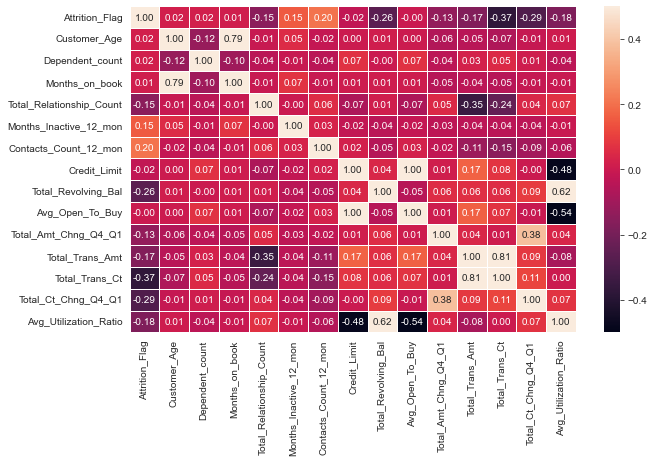

[CV 1/5] END criterion=gini, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3;, score=0.909 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15;, score=0.971 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=15;, score=0.973 total time=   1.2s
[CV 4/5] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=16;, score=0.977 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=13;, score=0.972 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=6;, score=0.958 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=110, max_features=auto, min_samples_leaf=1, 

In [121]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.heatmap(dfn.corr(),annot=True,lw=1,robust=True,fmt='.2f',vmin=-0.5,vmax=0.5)

1. Customer_Age has a strong correlation with Months_on_book
2. Total_Revolving_Bal has a positive correlation with Avg_Utilization_Ratio (People that use their CC more are likely to have unpaid balance)
3. Total_trans_amt has a strong correlation with Total_trans_ct (very straight forward)
4. Avg_Open_To_Buy has a perfect correlation with Credit_Limit. Therefore, only one of them will be included as predictor 

In [122]:
df.drop(['Avg_Open_To_Buy'], axis =1, inplace = True)
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,1,2,39,5,1,3,...,42,1.625,0.061,0,1,0,1,0,0,0
1,0,49,0,5,3,0,44,6,1,2,...,33,3.714,0.105,0,0,1,1,0,0,0
2,0,51,1,3,3,3,36,4,1,0,...,20,2.333,0.000,0,1,0,1,0,0,0


In [123]:
df.shape

(10127, 24)

# TEST AND TRAIN SPLIT

In [124]:
# Spliting dataset into predictor and target
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [125]:
# Feature Scaling with Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,1.059956,0.503368,-0.893680,0.597300,0.384621,0.763943,-1.327136,0.492404,0.446622,...,-0.973895,3.834003,-0.775882,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
1,0.333570,-0.943436,2.043199,0.593388,-0.887628,1.010715,1.407306,-1.327136,-0.411616,-0.041367,...,-1.357340,12.608573,-0.616276,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.044484,-0.240794
2,0.583058,1.059956,0.503368,0.593388,1.339764,0.008965,0.120579,-1.327136,-2.219655,-0.573698,...,-1.911206,6.807864,-0.997155,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
3,-0.789126,-0.943436,1.273283,-0.893680,-0.887628,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,...,-1.911206,6.807864,1.759686,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
4,-0.789126,1.059956,0.503368,-1.637214,0.597300,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,...,-1.570365,7.509325,-0.997155,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.593388,-0.145164,0.509840,-0.522785,-0.337598,0.492404,-0.509330,...,2.221481,0.608119,0.678714,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.044484,-0.240794
10123,-0.664382,1.059956,-0.266547,0.593388,-0.145164,-1.368442,0.120579,-0.337598,0.492404,-0.479181,...,0.176440,-0.122745,0.856458,3.541013,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
10124,-0.290150,-0.943436,-1.036462,-0.893680,-0.887628,0.008965,0.763943,0.651940,1.396424,-0.354626,...,-0.207005,0.444305,-0.997155,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
10125,-2.036565,1.059956,-0.266547,0.593388,-0.145164,0.008965,0.120579,0.651940,0.492404,-0.368710,...,-0.121795,0.041070,-0.997155,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794


In [126]:
X.shape

(10127, 23)

In [127]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Proportion of training set :")
print(y_train.value_counts())
print("Proportion of testing set :")
print(y_test.value_counts())

Proportion of training set :
0    6786
1    1315
Name: Attrition_Flag, dtype: int64
Proportion of testing set :
0    1714
1     312
Name: Attrition_Flag, dtype: int64


# Machine Learning Model

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Random Forest

In [129]:
#As we can evaluate above, Random Forest gives the highest accuracy 
model_rf = RandomForestClassifier(random_state=12)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)*100

96.29812438302073

[[1702   12]
 [  63  249]]


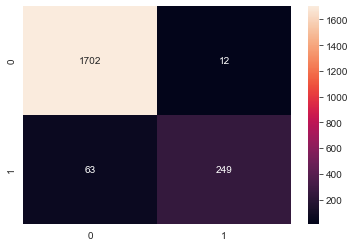

Accuracy : 0.9629812438302073
Precision : 0.9540229885057471
Recall : 0.7980769230769231
f2 : 0.8250497017892645
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1714
           1       0.95      0.80      0.87       312

    accuracy                           0.96      2026
   macro avg       0.96      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [175]:
y_pred = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.show()
print("Accuracy :" , accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("f2 :", fbeta_score(y_test, y_pred, beta=2.0))
print(classification_report(y_test, y_pred))

With Random Forest we can get 96.54% accuracy with 94.16% precision and 82.69% recall. However, due to imbalance dataset, the accuracy is bias. 

Thus, we focus on the precision, recall and f-beta score. 

With respect to our case, it is important to have a model that can give a high recall power. 

# Logistic Regression

In [131]:
model_lr = LogisticRegression(C=0.5, penalty='l2',n_jobs=6, random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, n_jobs=6, random_state=0)

In [176]:
y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision :", precision_score(y_test, y_pred_lr))
print("Recall :", recall_score(y_test, y_pred_lr))
print("f2 :", fbeta_score(y_test, y_pred_lr, beta=2.0))
print(classification_report(y_test, y_pred_lr))

[[1652   62]
 [ 134  178]]
Accuracy : 0.9032576505429417
Precision : 0.7416666666666667
Recall : 0.5705128205128205
f2 : 0.5981182795698925
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1714
           1       0.74      0.57      0.64       312

    accuracy                           0.90      2026
   macro avg       0.83      0.77      0.79      2026
weighted avg       0.90      0.90      0.90      2026



Logistoc Regression gives us a lower accuracy with 74.16% precision and 57.05 recall. Random Forest gives a more satisfactory result compare to Logistic Regression

# KNN

In [177]:
model_knn = KNeighborsClassifier(n_neighbors = 1)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print("Accurcay:", accuracy_score(y_test, y_pred_knn))
print("Precision :", precision_score(y_test, y_pred_knn))
print("Recall :", recall_score(y_test, y_pred_knn))
print("f2 :", fbeta_score(y_test, y_pred_knn, beta=2.0))
print(classification_report(y_test, y_pred_knn))

[[1632   82]
 [ 141  171]]
Accurcay: 0.8899308983218164
Precision : 0.6758893280632411
Recall : 0.5480769230769231
f2 : 0.5696202531645571
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1714
           1       0.68      0.55      0.61       312

    accuracy                           0.89      2026
   macro avg       0.80      0.75      0.77      2026
weighted avg       0.88      0.89      0.89      2026



KNN gives 88.99% accucary with 67.58 precision and 54.80 recall.

# Decision Tree

In [179]:
# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier(random_state = 12)
# Train Decision Tree Classifer
model_dt.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)
# Predictions and Evaluations
# Let's evaluate our decision tree model ! 
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision :", precision_score(y_test, y_pred_dt))
print("Recall :", recall_score(y_test, y_pred_dt))
print("f2 :", fbeta_score(y_test, y_pred_dt, beta=2.0))
print(classification_report(y_test, y_pred_dt))

[[1643   71]
 [  53  259]]
Accuracy: 0.9387956564659428
Precision : 0.7848484848484848
Recall : 0.8301282051282052
f2 : 0.8206590621039289
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1714
           1       0.78      0.83      0.81       312

    accuracy                           0.94      2026
   macro avg       0.88      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026



Decision tree gives us 93.83% accuracy with 79.8% precision and 80.12% recall

# SVM

In [180]:
from sklearn.svm import SVC
model_svc = SVC(C= .1, kernel='linear', gamma= 1, probability=False)
model_svc.fit(X_train, y_train)
print(model_svc.score(X_test, y_test))
y_pred_svc = model_svc.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_svc))
print("Accucracy :", accuracy_score(y_test, y_pred_svc))
print("Precision :", precision_score(y_test, y_pred_svc))
print("Recall :", recall_score(y_test, y_pred_svc))
print("f2 :", fbeta_score(y_test, y_pred_svc, beta=2.0))
print(classification_report(y_test, y_pred_svc))


0.9072063178677197
Confusion Matrix:
 [[1671   43]
 [ 145  167]]
Accucracy : 0.9072063178677197
Precision : 0.7952380952380952
Recall : 0.5352564102564102
f2 : 0.5727023319615913
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1714
           1       0.80      0.54      0.64       312

    accuracy                           0.91      2026
   macro avg       0.86      0.76      0.79      2026
weighted avg       0.90      0.91      0.90      2026



## Decision tree gives us 93.83% accuracy with 79.8% precision and 80.12% recall

# NN

In [181]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred_nn = classifier.predict(X_test)
cm = confusion_matrix(y_pred_nn, y_test)
print(cm)
print("Accuracy :", accuracy_score(y_test, y_pred_nn))
print("Precision :", precision_score(y_test, y_pred_nn))
print("Recall :", recall_score(y_test, y_pred_nn))
print("f2 :", fbeta_score(y_test, y_pred_nn, beta=2.0))
print(classification_report(y_test, y_pred_nn))



[[1662   82]
 [  52  230]]
Accuracy : 0.9338598223099703
Precision : 0.8156028368794326
Recall : 0.7371794871794872
f2 : 0.7516339869281046
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1714
           1       0.82      0.74      0.77       312

    accuracy                           0.93      2026
   macro avg       0.88      0.85      0.87      2026
weighted avg       0.93      0.93      0.93      2026



### Decision tree gives us 93.83% accuracy with 79.8% precision and 80.12% recall

From 6 model, we may conclude that Random Forest gives the best result with 96.54% accuracy with 94.16% precision and 82.69% recall


In [154]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(),  
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(probability=True),
               MLPClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

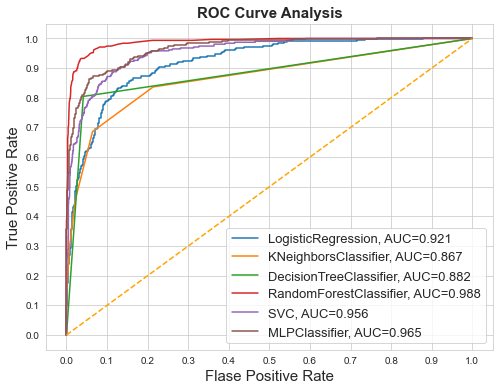

In [163]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('multiple_roc_curve.png')

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications. As we can see, Random Forest gives the best AUC



In [164]:
#ADDRESSING IMBALANCE DATASET 
!pip install imblearn

In [182]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1315
Before OverSampling, counts of label '0': 6786 

After OverSampling, the shape of train_X: (13572, 23)
After OverSampling, the shape of train_y: (13572,) 

After OverSampling, counts of label '1': 6786
After OverSampling, counts of label '0': 6786


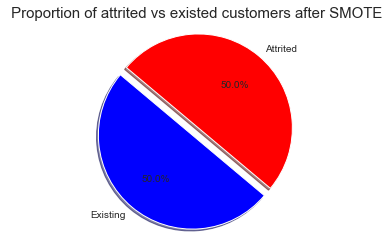

In [183]:
#Attrition_Flag is in binary form, therefore we can use pie chart to visualize the proportions
x = ['Existing', 'Attrited']
y = [6786, 6786]
labels = x
sizes = y

colors = ['blue', 'red']
explode = (0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title(' Proportion of attrited vs existed customers after SMOTE', fontsize=15)
plt.axis('equal')
plt.show()

[[1677   37]
 [  48  264]]


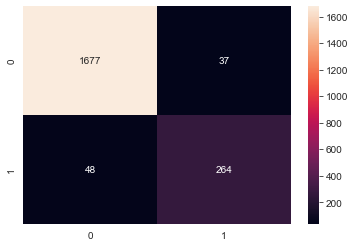

Accuracy : 0.9580454096742349
Precision : 0.8770764119601329
Recall : 0.8461538461538461
f2 : 0.8521626856036152
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1714
           1       0.88      0.85      0.86       312

    accuracy                           0.96      2026
   macro avg       0.92      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [184]:
model_smote = RandomForestClassifier(random_state= 12)
model_smote.fit(X_train_res, y_train_res)
y_pred_smote = model_smote.predict(X_test)
cm_smote = confusion_matrix(y_test, y_pred_smote)
print(cm_smote)
sns.heatmap(cm_smote, annot=True, fmt='g')
plt.show()
print("Accuracy :" , accuracy_score(y_test, y_pred_smote))
print("Precision :", precision_score(y_test, y_pred_smote))
print("Recall :", recall_score(y_test, y_pred_smote))
print("f2 :", fbeta_score(y_test, y_pred_smote, beta=2.0))
print(classification_report(y_test, y_pred_smote))

When we have a strong class imbalance, we have very few cases in one class, resulting in the model hardly ever predicting that class. Using SMOTE we can tweak the model to reduce false negatives (positives that are predicted as negative), at the cost of increasing false positives(negative but predicted positive). The result of using SMOTE is generally an increase in recall, at the cost of lower precision. This means that we will add more predictions of the minority class: some of them correct (increasing recall), but some of them wrong (decreasing precision). The overall model accuracy may also decrease, but this is not a problem: accuracy should not be used as a metric in case of imbalanced data.


Before and After SMOTE :
Recall of churners increase from 82.69 to 84.61 while the precision decreases from 94.16 to 87.70. We are able to identify more churners. 

# Hyperparameter Tunning

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_param = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'criterion': ['entropy', 'gini']}

In [193]:
clf =  RandomForestClassifier(random_state= 12)
model_rf_2 = RandomizedSearchCV(estimator = clf, param_distributions = random_param, n_iter = 20, 
                            cv = 5, verbose= 5, n_jobs = -1)
model_rf_2.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   verbose=5)

RandomForestClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
                       min_samples_split=10, n_estimators=20, random_state=12)


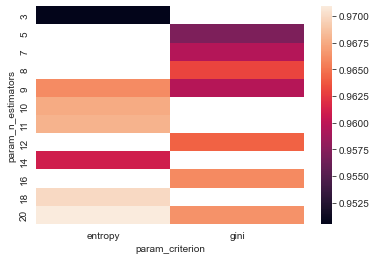

In [194]:
table = pd.pivot_table(pd.DataFrame(model_rf_2.cv_results_), values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
sns.heatmap(table)
print(model_rf_2.best_estimator_)

[[1666   48]
 [  39  273]]


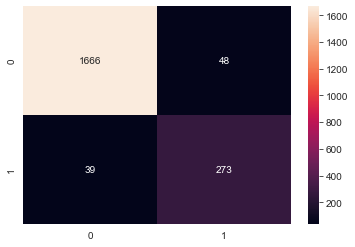

Accuracy : 0.9570582428430404
Precision : 0.8504672897196262
Recall : 0.875
f2 : 0.869980879541109
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1714
           1       0.85      0.88      0.86       312

    accuracy                           0.96      2026
   macro avg       0.91      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[CV 4/5] END criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=15;, score=0.974 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.838 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.934 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=4

In [195]:
y_pred_be = model_rf_2.best_estimator_.predict(X_test)
cm_be = confusion_matrix(y_test, y_pred_be)
print(cm_be)
sns.heatmap(cm_be, annot=True, fmt='g')
plt.show()
print("Accuracy :", accuracy_score(y_test, y_pred_be))
print("Precision :", precision_score(y_test, y_pred_be))
print("Recall :", recall_score(y_test, y_pred_be))
print("f2 :", fbeta_score(y_test, y_pred_be, beta=2.0))
print(classification_report(y_test, y_pred_be))

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

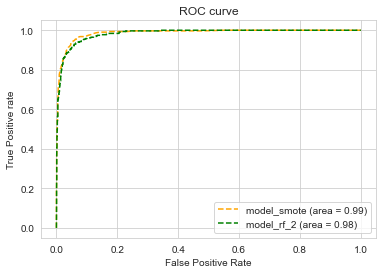

[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=1;, score=0.924 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.966 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=15;, score=0.934 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1;, score=0.854 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1;, score=0.931 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1;, score=0.923 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=3, 

In [172]:
# predict probabilities
pred_prob1 = model_smote.predict_proba(X_test)
pred_prob2 = model_rf_2.best_estimator_.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='model_smote (area = %0.2f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='model_rf_2 (area = %0.2f)' % auc_score2)

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

# Feature Importance

In [80]:
# Let's load the packages

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [86]:
importances = model_rf_2.best_estimator_.feature_importances_
# Sort the feature importance in descending order

sorted_indices = np.argsort(importances)[::-1]


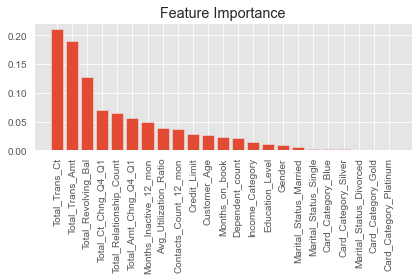

In [87]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train_res.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_res.shape[1]), X_train_res.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()